# Exploratory data analysis (EDA)

The goal of this EDA task is to gather information on more than 1,000 unicorn companies. This information will include their industry, country of origin, year of founding, and some of their key investors. By analyzing this data, we hope to gain valuable insights into how and when companies achieve unicorn status, and use this information to make recommendations for the investing firm's next steps.

## Step 1: Imports

In [1]:
!pip install -U ydata-profiling

In [2]:
# Import libraries and packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv('/kaggle/input/unicorn-companies/Unicorn_Companies.csv')

## Step 2: Data exploration

In [4]:
# Create an instance
profile = ProfileReport(df, title="Profile Report")

# Run Report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Display the first 10 rows of the data
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [6]:
# How large the dataset is
df.size

10740

In [7]:
# Shape of the dataset
df.shape

(1074, 10)

In [8]:
# Get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


## Step 3: Statistical tests

In [9]:
# Get descriptive statistics
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [10]:
# Step 1: Use pd.to_datetime() to convert Date Joined column to datetime 
# Step 2: Update the column with the converted values
df['Date Joined']= pd.to_datetime(df['Date Joined'])


In [11]:
# Use .info() to confirm that the update actually took place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [12]:
# Step 1: Use .dt.year to extract year component from Date Joined column
# Step 2: Add the result as a new column named Year Joined to the DataFrame
df['year'] = df['Date Joined'].dt.year

In [13]:
# Use .head() to confirm that the new column did get added
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Step 4: Results and evaluation

### Take a sample of the data

In [14]:
# Step 1: Use sample() with the n parameter set to 50 to randomly sample 50 unicorn companies from the data. 
# Specify the random_state parameter so that if you run this cell multiple times, you get the same sample each time. 
# Step 2: Save the result in a new variable.

df.sample(50)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,year
895,Clearcover,$1B,2021-04-13,Fintech,Chicago,United States,North America,2016,$305M,"American Family Ventures, Cox Enterprises, OME...",2021
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017
140,Anduril,$5B,2019-09-11,Artificial intelligence,Irvine,United States,North America,2017,$691M,"Andreessen Horowitz, Founders Fund, Revolution...",2019
1001,Playco,$1B,2020-09-21,Other,Tokyo,Japan,Asia,2020,$140M,"Sozo Ventures, Caffeinated Capital, Sequoia Ca...",2020
864,Aptos,$1B,2022-03-15,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ...",2022
819,G2,$1B,2021-06-22,Internet software & services,Chicago,United States,North America,2012,$258M,"Pritzker Group Venture Capital, Accel, Hyde Pa...",2021
587,Preferred Networks,$2B,2018-05-17,Artificial intelligence,Tokyo,Japan,Asia,2014,$147M,"Toyota Motor Corporation, Mizuho Financial Gro...",2018
475,Gousto,$2B,2020-11-03,"Supply chain, logistics, & delivery",London,United Kingdom,Europe,2012,$311M,"MMC Ventures, BGF Ventures, Unilever Ventures",2020
801,Elemy,$1B,2021-10-06,Health,San Francisco,United States,North America,2019,$323M,"General Catalyst, Bling Capital, Felicis Ventures",2021
704,Papa,$1B,2021-11-04,Health,Miami,United States,North America,2016,$241M,"Initialized Capital, Canaan Partners, Sound Ve...",2021


### Visualize the time it took companies to reach unicorn status

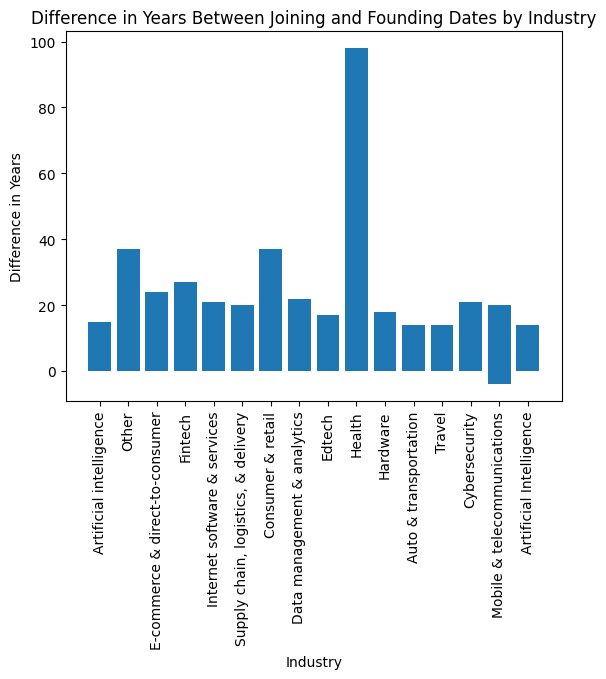

In [15]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars

# Calculate the difference in years between Year Joined and Year Founded columns
year_diff = df['Date Joined'].dt.year - df['Year Founded']

# Create bar plot
plt.bar(df['Industry'], year_diff)

# Set title
plt.title('Difference in Years Between Joining and Founding Dates by Industry')

# Set x-axis label
plt.xlabel('Industry')

# Set y-axis label
plt.ylabel('Difference in Years')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Visualize the maximum unicorn company valuation per industry

/tmp/ipykernel_20/1432474432.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = df['Valuation'].str.replace('$','').str.replace('B','').astype(float)


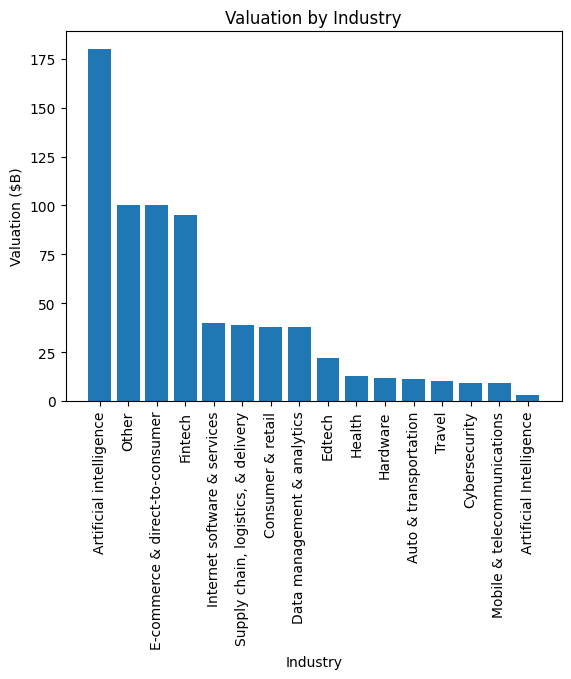

In [16]:
# Create bar plot
# with Industry column as the categories of the bars
# and Valuation column as the heights of the bars
# Convert Valuation column from string to float
df['Valuation'] = df['Valuation'].str.replace('$','').str.replace('B','').astype(float)

# Create bar plot with Industry column as the categories of the bars
# and Valuation column as the heights of the bars
plt.bar(df['Industry'], df['Valuation'])

# Set title
plt.title('Valuation by Industry')

# Set x-axis label
plt.xlabel('Industry')

# Set y-axis label
plt.ylabel('Valuation ($B)')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text
plt.xticks(rotation=90)

# Display the plot
plt.show()
